## Exploratory Data Analysis

### Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 설정
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

### 데이터 로드

In [3]:
df = pd.read_csv('../data/time-based-split/1_train.csv')
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (283074, 79)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


### 결측치 및 데이터 타입 확인

In [4]:
# 생략 없이 전체 컬럼을 출력하도록 설정
pd.set_option('display.max_rows', None)     # 모든 행 출력
pd.set_option('display.max_columns', None)  # 모든 열 출력
pd.set_option('display.width', None)        # 줄바꿈 없이 가로로 출력
pd.set_option('display.max_colwidth', None) # 컬럼 내 최대 문자 길이 제한 해제

print("Missing values (sorted):")
print(df.isnull().sum().sort_values(ascending=False))

print("Data types per column:")
print(df.dtypes)

pd.reset_option("display.max_rows")
pd.reset_option("display.max_columns")
pd.reset_option("display.width")
pd.reset_option("display.max_colwidth")

Missing values (sorted):
Flow Bytes/s                    10
 Flow Duration                   0
 Destination Port                0
 Total Backward Packets          0
Total Length of Fwd Packets      0
 Total Length of Bwd Packets     0
 Total Fwd Packets               0
 Fwd Packet Length Max           0
 Fwd Packet Length Min           0
 Fwd Packet Length Std           0
 Fwd Packet Length Mean          0
Bwd Packet Length Max            0
 Bwd Packet Length Min           0
 Bwd Packet Length Mean          0
 Bwd Packet Length Std           0
 Flow Packets/s                  0
 Flow IAT Mean                   0
 Flow IAT Std                    0
 Flow IAT Max                    0
 Flow IAT Min                    0
Fwd IAT Total                    0
 Fwd IAT Mean                    0
 Fwd IAT Std                     0
 Fwd IAT Max                     0
 Fwd IAT Min                     0
Bwd IAT Total                    0
 Bwd IAT Mean                    0
 Bwd IAT Std                  

### 기본 통계량 출력

In [5]:
print("\nDescriptive statistics:")
display(df.describe(include='all'))


Descriptive statistics:


c:\Users\Admin\Desktop\security-engineer\Python\waap-ml-research\02-adaptive-traffic-classifier\venv\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\Admin\Desktop\security-engineer\Python\waap-ml-research\02-adaptive-traffic-classifier\venv\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,283074.000000,2.830740e+05,283074.000000,283074.000000,283074.000000,2.830740e+05,283074.000000,283074.000000,283074.000000,283074.000000,...,283074.000000,2.830740e+05,2.830740e+05,2.830740e+05,2.830740e+05,2.830740e+05,2.830740e+05,2.830740e+05,2.830740e+05,283074
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BENIGN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,154675
mean,8455.445516,1.527585e+07,5.206084,4.978917,865.059769,5.976298e+03,467.943481,26.760232,143.124988,183.817001,...,22.208666,1.620666e+05,2.113589e+04,2.021120e+05,1.505358e+05,8.920251e+06,2.904461e+06,1.097643e+07,6.846467e+06,NaN
std,19247.009866,3.144135e+07,20.008308,28.066527,3259.941282,5.138707e+04,1686.018535,146.672190,456.439692,720.182203,...,4.886900,7.435000e+05,2.510590e+05,9.239474e+05,7.213052e+05,2.047983e+07,1.150242e+07,2.498656e+07,1.862926e+07,NaN
min,0.000000,-1.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
25%,80.000000,3.301200e+04,2.000000,1.000000,26.000000,0.000000e+00,6.000000,0.000000,6.000000,0.000000,...,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
50%,80.000000,9.102870e+05,3.000000,2.000000,30.000000,1.540000e+02,20.000000,6.000000,8.666667,0.000000,...,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
75%,443.000000,7.971701e+06,5.000000,5.000000,76.000000,1.160100e+04,44.000000,6.000000,41.000000,10.263203,...,20.000000,1.011000e+03,0.000000e+00,1.011000e+03,1.010000e+03,7.501646e+06,0.000000e+00,7.507376e+06,6.343558e+06,NaN


### 범주형/수치형 컬럼 분리

In [6]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print(f"\nCategorical columns ({len(categorical_cols)}): {categorical_cols}")
print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols}")


Categorical columns (1): [' Label']
Numerical columns (78): [' Destination Port', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count', ' SYN Flag Count', ' RST F

### 수치형 변수 분포 확인
- 너무 많은 데이터 출력으로 인한 생략

In [8]:
# for col in numerical_cols:
#     plt.figure()
#     sns.histplot(df[col].dropna(), kde=True, bins=50)
#     plt.title(f'Distribution of {col}')
#     plt.xlabel(col)
#     plt.ylabel('Frequency')
#     plt.show()

### 상관관계 시각화

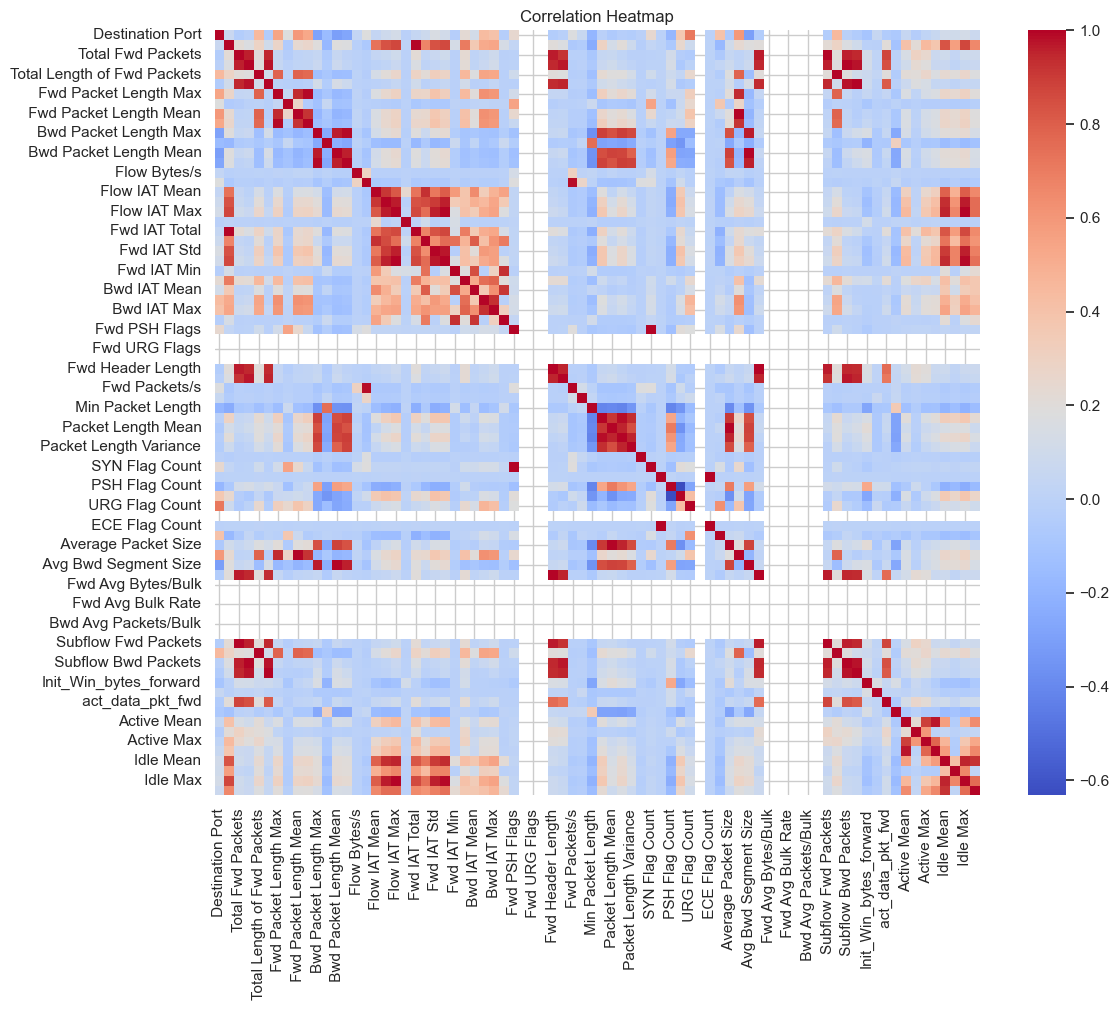

In [16]:
corr = df[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=False, cmap="coolwarm", square=True, cbar=True)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

### 범주형 변수 분포 확인 (상위 10개)

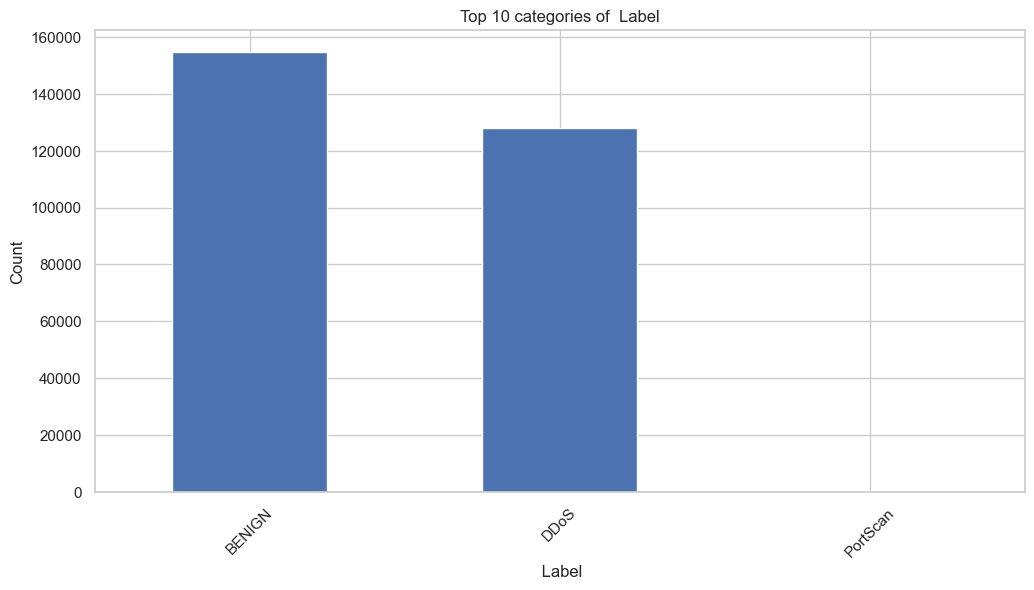

In [10]:
for col in categorical_cols:
    plt.figure()
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f'Top 10 categories of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()